# Initialization

In [247]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    """A node in the binary search tree."""
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    """Binary Search Tree implementation."""
    def __init__(self):
        self.root = None

    def insert(self, key):
        """Insert a key into the BST."""
        self.root = self._insert(self.root, key)

    def _insert(self, root, key):
        if root is None:
            return Node(key)
        if key < root.key:
            root.left = self._insert(root.left, key)
        elif key > root.key:
            root.right = self._insert(root.right, key)
        return root
    
    def delete(self, key):
        """Delete a key from the BST."""
        self.root = self._delete(self.root, key)

    def _delete(self, root, key):
        if root is None:
            return root
        if key < root.key:
            root.left = self._delete(root.left, key)
        elif key > root.key:
            root.right = self._delete(root.right, key)
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            root.key = self._min_value_node(root.right).key
            root.right = self._delete(root.right, root.key)
        return root

    def _min_value_node(self, root):
        while root.left is not None:
            root = root.left
        return root.key

    def search(self, key):
        """Search for a key in the BST."""
        return self._search(self.root, key)

    def _search(self, root, key):
        if root is None:
            return False
        if root.key == key:
            return True
        if key < root.key:
            return self._search(root.left, key)
        return self._search(root.right, key)

    def inorder_traversal(self):
        """Perform inorder traversal of the BST."""
        result = []
        self._inorder_traversal(self.root, result)
        return result

    def _inorder_traversal(self, root, result):
        if root:
            self._inorder_traversal(root.left, result)
            result.append(root.key)
            self._inorder_traversal(root.right, result)

    def plot_tree(self, title="Binary Search Tree", color="lightblue"):
        """Plot the BST."""
        G = nx.DiGraph()
        pos = self._build_graph(G, self.root)
        nx.draw(G, pos, with_labels=True, node_color=color, node_size=800, arrows=False)
        plt.title(title)
        plt.show()

    def _build_graph(self, G, node, pos=None, x=0, y=0, layer=1):
        if pos is None:
            pos = {node.key: (x, y)}
        else:
            pos[node.key] = (x, y)
        if node.left is not None:
            left_pos = (x - 1 / 2 ** layer, y - 1)
            G.add_edge(node.key, node.left.key)
            self._build_graph(G, node.left, pos, left_pos[0], left_pos[1], layer + 1)
        if node.right is not None:
            right_pos = (x + 1 / 2 ** layer, y - 1)
            G.add_edge(node.key, node.right.key)
            self._build_graph(G, node.right, pos, right_pos[0], right_pos[1], layer + 1)
        return pos

# Tree A

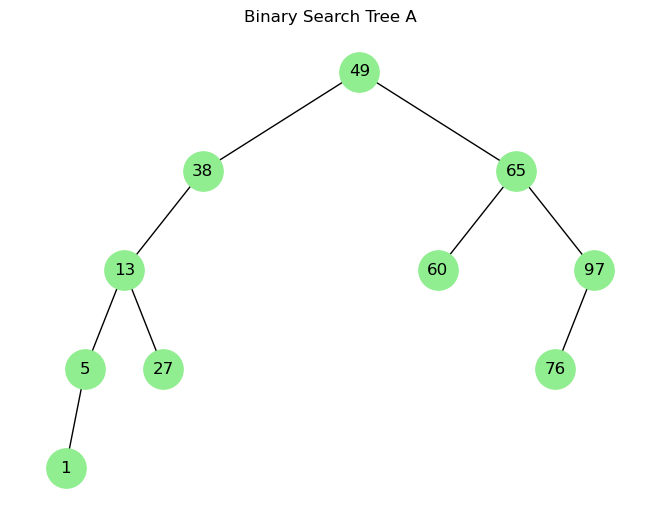

In [248]:
bst_a = BinarySearchTree()
a = [49, 38, 65, 97, 60, 76, 13, 27, 5, 1]

for num in a:
    bst_a.insert(num)

plt.figure(facecolor="white")
bst_a.plot_tree(title="Binary Search Tree A", color="lightgreen")

Inserted 90 into the BST


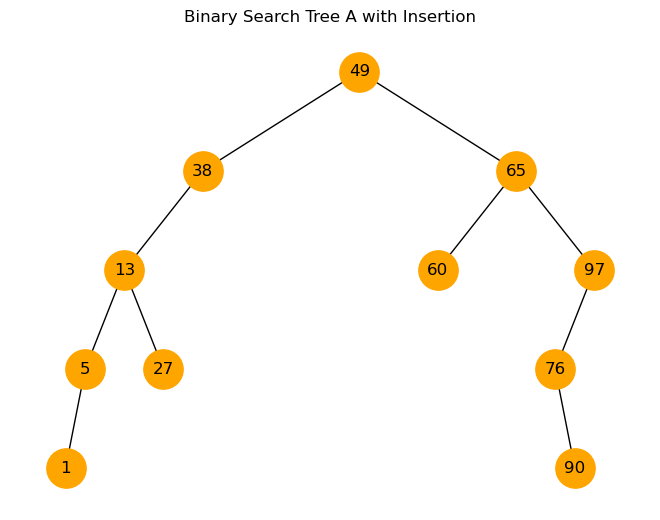

In [249]:
value_to_insert = 90
bst_a.insert(value_to_insert)
print(f"Inserted {value_to_insert} into the BST")

plt.figure(facecolor="white")
bst_a.plot_tree(title="Binary Search Tree A with Insertion", color="orange")

Deleted 27 from the BST


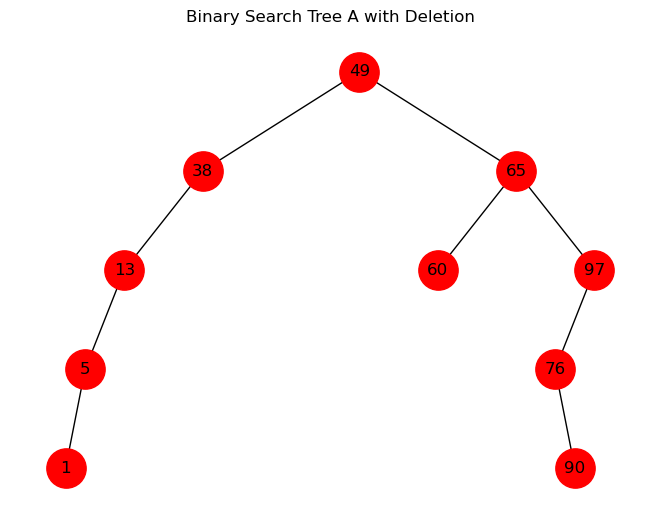

In [250]:
value_to_delete = 27
bst_a.delete(value_to_delete)
print(f"Deleted {value_to_delete} from the BST")

plt.figure(facecolor="white")
bst_a.plot_tree(title="Binary Search Tree A with Deletion", color="red")

In [251]:
value_to_search = 76
result = bst_a.search(value_to_search)
print(f"Search for {value_to_search} in Tree A: {result}")

value_to_search = 34
result = bst_a.search(value_to_search)
print(f"Search for {value_to_search} in Tree A: {result}")

Search for 76 in Tree A: True
Search for 34 in Tree A: False


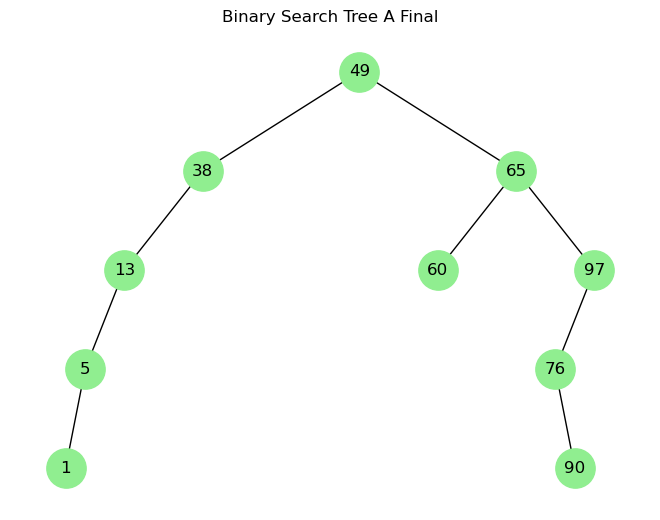

In [252]:
plt.figure(facecolor="green")
bst_a.plot_tree(title="Binary Search Tree A Final", color="lightgreen")
plt.show()

In [253]:
min_value_node = bst_a._min_value_node(bst_a.root)
print(f"Min value node: {min_value_node}")

Min value node: 1


In [254]:
inorder_traversal = bst_a.inorder_traversal()
print(f"Inorder Traversal: {inorder_traversal}")

Inorder Traversal: [1, 5, 13, 38, 49, 60, 65, 76, 90, 97]


# Tree B

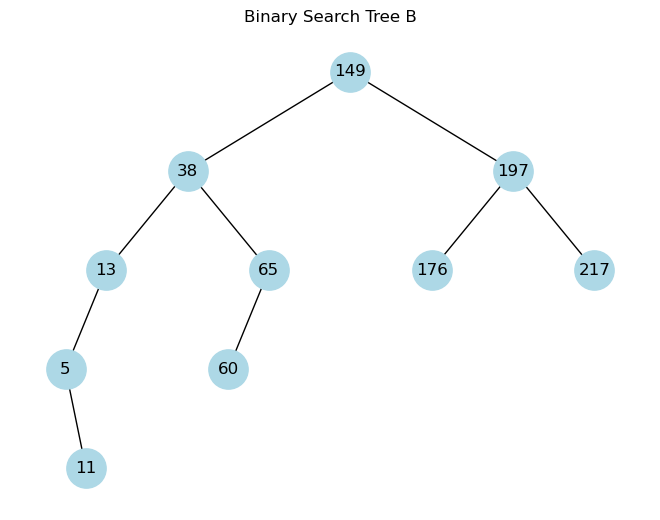

In [255]:
bst_b = BinarySearchTree()
b = [149, 38, 65, 197, 60, 176, 13, 217, 5, 11]

for num in b:
    bst_b.insert(num)

plt.figure(facecolor="white")
bst_b.plot_tree(title="Binary Search Tree B", color="lightblue")

Inserted 15 into the BST
Inserted 74 into the BST


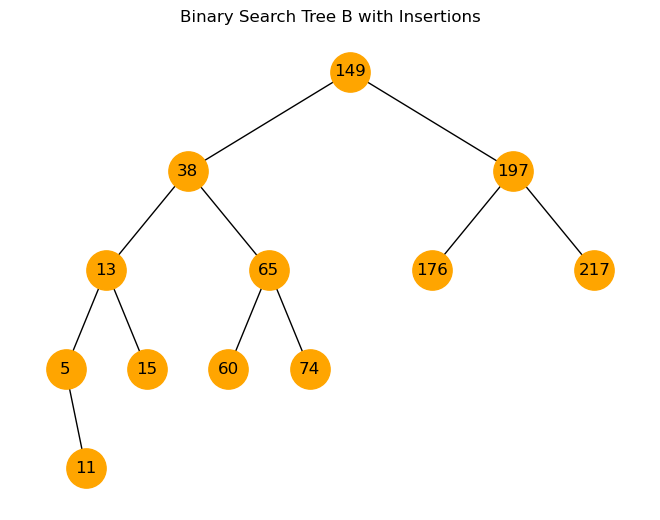

In [256]:
values_to_insert = 15, 74
for value in values_to_insert:
    bst_b.insert(value)
    print(f"Inserted {value} into the BST")

plt.figure(facecolor="white")
bst_b.plot_tree(title="Binary Search Tree B with Insertions", color="orange")

Deleted 5 from the BST
Deleted 176 from the BST


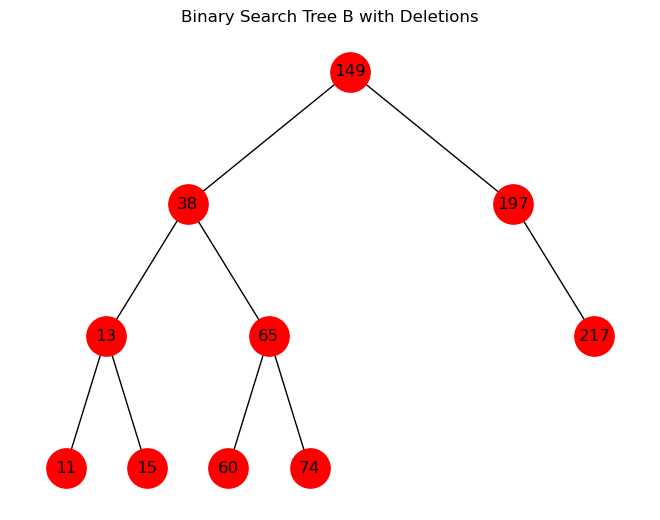

In [257]:
values_to_delete = 5, 176
for value in values_to_delete:
    bst_b.delete(value)
    print(f"Deleted {value} from the BST")

plt.figure(facecolor="white")
bst_b.plot_tree(title="Binary Search Tree B with Deletions", color="red")

In [258]:
value_to_search = 176
result = bst_b.search(value_to_search)
print(f"Search for {value_to_search} in Tree B: {result}")

value_to_search = 149
result = bst_b.search(value_to_search)
print(f"Search for {value_to_search} in Tree B: {result}")

Search for 176 in Tree B: False
Search for 149 in Tree B: True


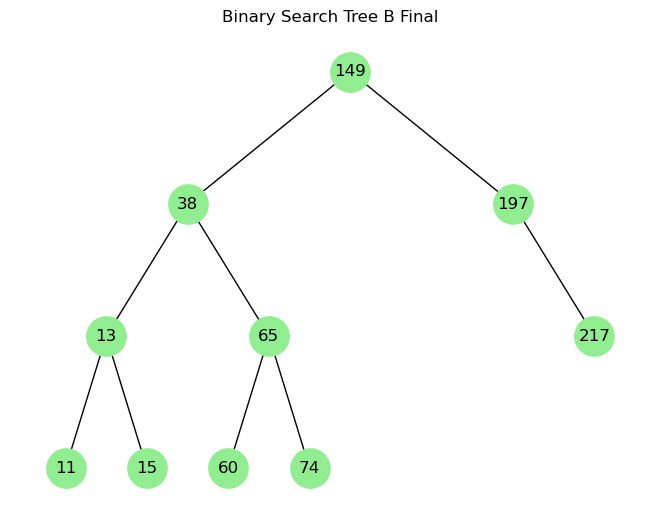

In [259]:
plt.figure(facecolor="green")
bst_b.plot_tree(title="Binary Search Tree B Final", color="lightgreen")
plt.show()

In [260]:
min_value_node = bst_b._min_value_node(bst_b.root)
print(f"Min value node: {min_value_node}")

Min value node: 11


In [261]:
inorder_traversal = bst_b.inorder_traversal()
print(f"Inorder Traversal: {inorder_traversal}")

Inorder Traversal: [11, 13, 15, 38, 60, 65, 74, 149, 197, 217]


# Tree C

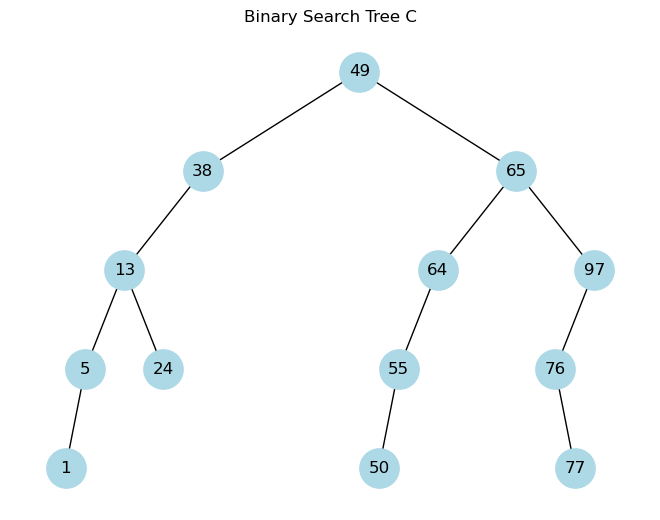

In [262]:
bst_c = BinarySearchTree()
c = [49, 38, 65, 97, 64, 76, 13, 77, 5, 1, 55, 50, 24]

for num in c:
    bst_c.insert(num)

plt.figure(facecolor="white")
bst_c.plot_tree(title="Binary Search Tree C", color="lightblue")

Inserted 40 into the BST
Inserted 58 into the BST


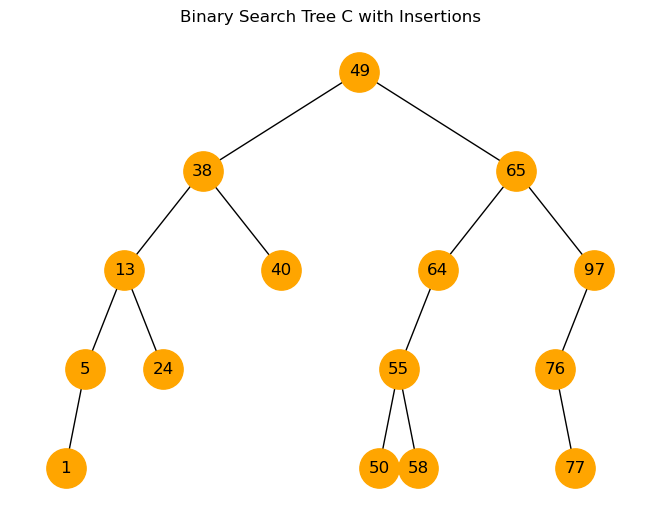

In [263]:
values_to_insert = 40, 58
for value in values_to_insert:
    bst_c.insert(value)
    print(f"Inserted {value} into the BST")

plt.figure(facecolor="white")
bst_c.plot_tree(title="Binary Search Tree C with Insertions", color="orange")

Deleted 5 from the BST
Deleted 76 from the BST


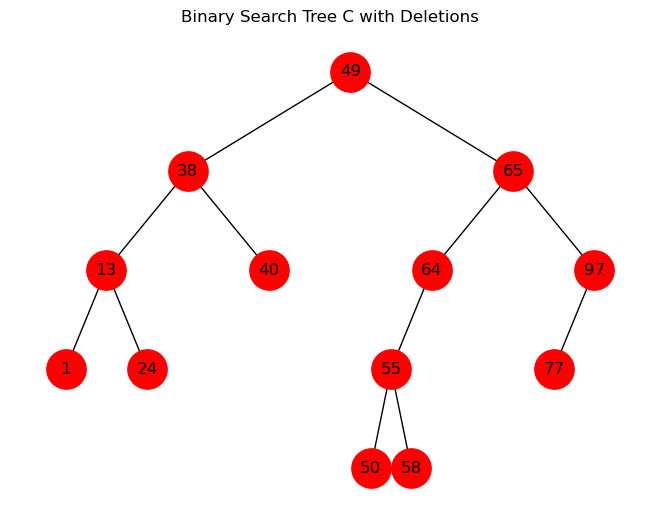

In [264]:
values_to_delete = 5, 76
for value in values_to_delete:
    bst_c.delete(value)
    print(f"Deleted {value} from the BST")

plt.figure(facecolor="white")
bst_c.plot_tree(title="Binary Search Tree C with Deletions", color="red")

In [270]:
value_to_search = 58
result = bst_c.search(value_to_search)
print(f"Search for {value_to_search} in Tree C: {result}")

value_to_search = 100
result = bst_c.search(value_to_search)
print(f"Search for {value_to_search} in Tree C: {result}")

Search for 58 in Tree C: True
Search for 100 in Tree C: False


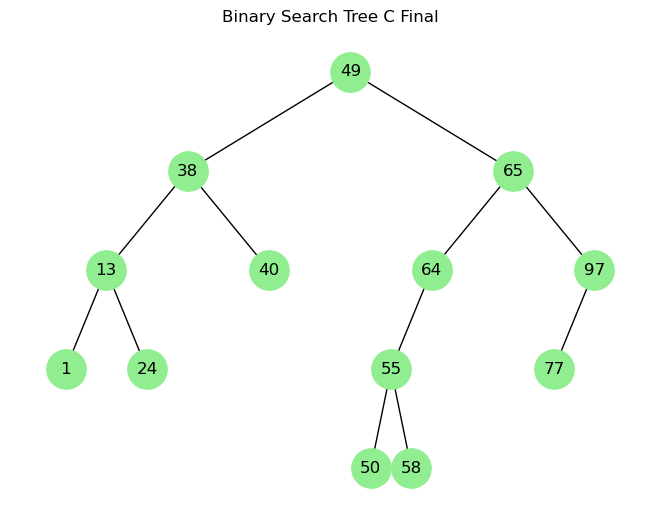

In [ ]:
plt.figure(facecolor="green")
bst_c.plot_tree(title="Binary Search Tree C Final", color="lightgreen")
plt.show()

In [245]:
min_value_node = bst_c._min_value_node(bst_c.root)
print(f"Min value node: {min_value_node}")

Min value node: 1


In [246]:
inorder_traversal = bst_c.inorder_traversal()
print(f"Inorder Traversal: {inorder_traversal}")

Inorder Traversal: [1, 13, 24, 38, 40, 49, 50, 55, 58, 64, 65, 77, 97]
